In [36]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from geopy.geocoders import Nominatim
import time

In [47]:
import plotly.io as pio

In [37]:
#  Loading the req datasets
financial_data = pd.read_csv('finanical_information.csv',)
industry_data = pd.read_csv('industry_client_details.csv')
payment_data = pd.read_csv('payment_information.csv')
subscription_data = pd.read_csv('subscription_information.csv')

In [38]:
# Convert date columns in subscription data to datetime format, handling errors gracefully
subscription_data["start_date"] = pd.to_datetime(subscription_data["start_date"], errors='coerce', dayfirst=True)
subscription_data["end_date"] = pd.to_datetime(subscription_data["end_date"], errors='coerce', dayfirst=True)


In [39]:
# Ensure date columns are properly formatted in other datasets
subscription_data['start_date'] = pd.to_datetime(subscription_data['start_date'], errors='coerce')
financial_data['start_date'] = pd.to_datetime(financial_data['start_date'], errors='coerce')
financial_data['year'] = financial_data['start_date'].dt.year


# # Merge subscription data with payment data to include payment methods
subscription_data = subscription_data.merge(payment_data[['client_id', 'payment_method']], on='client_id', how='left')


In [26]:
# Load the dataset as string first to inspect issues ( this was to clear some errors in the date format)
subscription_data = pd.read_csv("subscription_information.csv", dtype=str)

# Trim spaces and check unique formats in 'start_date'
subscription_data["start_date"] = subscription_data["start_date"].str.strip()  # Remove leading/trailing spaces
print("Unique start_date values:", subscription_data["start_date"].dropna().unique())

# Convert to datetime (handling different formats)
subscription_data["start_date"] = pd.to_datetime(subscription_data["start_date"], errors='coerce', dayfirst=True)

# Check remaining NaT values
print(f"Still missing Start Dates: {subscription_data['start_date'].isna().sum()}")

# Display problematic rows
print(subscription_data[subscription_data["start_date"].isna()][["client_id", "start_date"]])


Unique start_date values: ['11-11-2020' '24-05-2021' '25-12-2021' '14-03-2020' '07-11-2019'
 '24-02-2022' '14-06-2019' '11-10-2022' '03-12-2018' '07-07-2019'
 '17-09-2020' '05-07-2021' '16-05-2019' '19-09-2020' '25-11-2022'
 '30-08-2021' '09-04-2022' '24-01-2019' '25-01-2020' '04-06-2021'
 '14-08-2020' '29-12-2019' '29-05-2018' '19-07-2019' '18-05-2018'
 '15-09-2021' '15-11-2019' '03-06-2020' '18-12-2021' '03-04-2018'
 '06-06-2022' '01-05-2019' '15-11-2021' '21-05-2018' '02-12-2021'
 '25-06-2020' '13-02-2021' '20-12-2022' '04-04-2020' '06-01-2022'
 '13-11-2020' '15-05-2020' '02-06-2021' '17-12-2020' '17-02-2022'
 '09-07-2019' '02-03-2019' '06-03-2022' '21-07-2018' '04-11-2020'
 '08-11-2018' '10-07-2018' '23-02-2021' '24-04-2021' '26-07-2021'
 '29-03-2020' '30-12-2019' '06-07-2019' '14-12-2018' '28-06-2021'
 '14-11-2022' '19-01-2021' '14-02-2022' '12-12-2018' '12-04-2018'
 '19-12-2018' '10-02-2018' '14-09-2019' '28-11-2018' '24-05-2019'
 '21-04-2019' '03-06-2021' '28-07-2022' '01-04-201

1) How many finance lending and blockchain clients does the organization have?

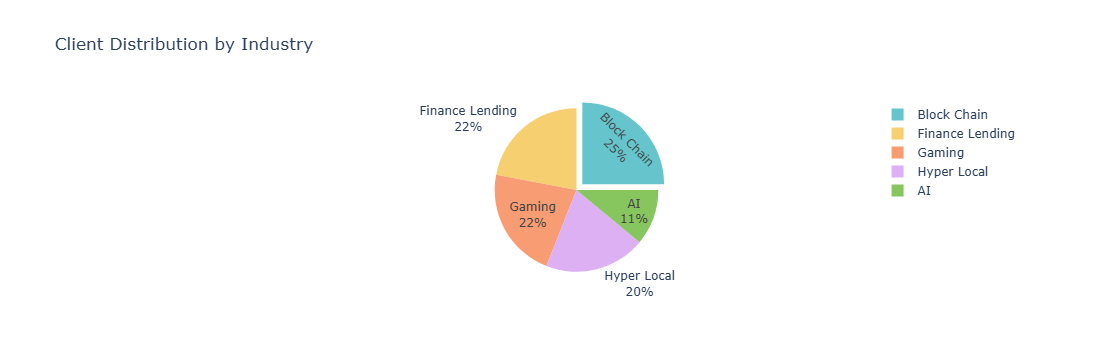

In [49]:
# Visualize client distribution by industry using an interactive pie chart
client_counts = industry_data['industry'].value_counts()
fig = px.pie(
    names=client_counts.index,
    values=client_counts,
    title='Client Distribution by Industry',
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_traces(textinfo='percent+label', pull=[0.1 if i == client_counts.idxmax() else 0 for i in client_counts.index])
fig.show()
pio.write_html(fig, "Client Distribution by Industry.html")


In [30]:
# Identify the industry with the highest number of clients
highest_client_industry = client_counts.idxmax()
highest_client_count = client_counts.max()

print(f'Industry with the highest number of clients: {highest_client_industry} ({highest_client_count} clients)')


Industry with the highest number of clients: Block Chain (25 clients)


Which industry in the organization has the highest renewal rate?

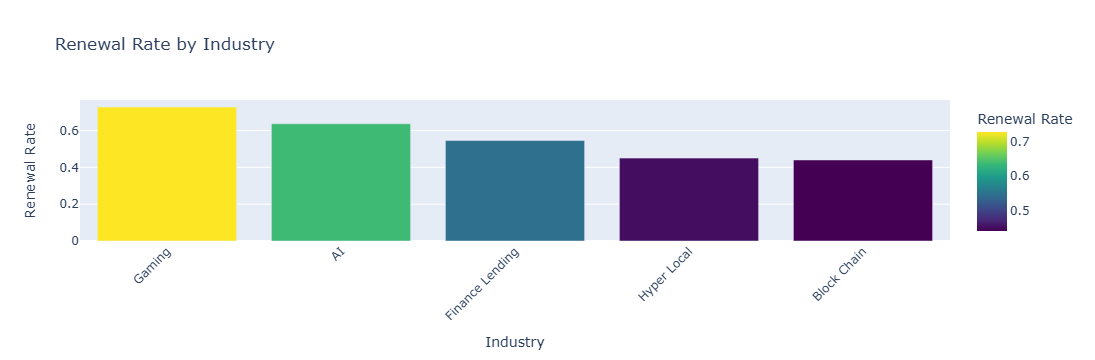

In [51]:
# Analyze and visualize industry renewal rates
# Merge subscription data with industry data to associate industries with clients
subscription_industry = subscription_data.merge(industry_data, on='client_id', how='left')

# Calculate the average renewal rate per industry

industry_renewal_rates = subscription_industry.groupby('industry')['renewed'].mean().reset_index()
industry_renewal_rates = industry_renewal_rates.sort_values(by='renewed', ascending=False)

# Create an interactive bar chart to display renewal rates by industry
fig_industry = px.bar(
    industry_renewal_rates, x='industry', y='renewed',
    color='renewed', title='Renewal Rate by Industry',
    labels={'industry': 'Industry', 'renewed': 'Renewal Rate'},
    color_continuous_scale='viridis'
)

# Improve readability by tilting x-axis labels and adding spacing between bars
fig_industry.update_layout(xaxis=dict(tickangle=-45), bargap=0.2)
fig_industry.show()
pio.write_html(fig, 'Renewal Rate by Industry.html')

In [28]:
# Identify the industry with the highest renewal rate

highest_renewal_industry = industry_renewal_rates.loc[industry_renewal_rates['renewed'].idxmax(), 'industry']
print(f'Industry with the highest renewal rate: {highest_renewal_industry}')

Industry with the highest renewal rate: Gaming


C:\Users\Kakashi\AppData\Local\Temp\ipykernel_22356\784230949.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




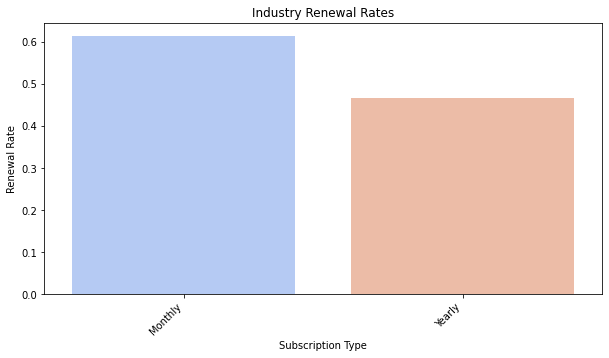

In [11]:
# Chart to find which subscription has higher renewal rate

industry_renewal_rates = subscription_data.groupby('subscription_type')['renewed'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=industry_renewal_rates.index, y=industry_renewal_rates.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Industry Renewal Rates')
plt.xlabel('Subscription Type')
plt.ylabel('Renewal Rate')
plt.show()

What was the average inflation rate when their subscriptions were renewed?

In [12]:
# Calculate and display the average inflation rate at subscription renewal

avg_inflation_rate = financial_data['inflation_rate'].mean()
print(f'Average Inflation Rate at Subscription Renewal: {avg_inflation_rate:.2f}%')


Average Inflation Rate at Subscription Renewal: 4.43%


In [24]:
''' so we had maybe human bias or some other bias here in financial data especially. 
the start date and end date's format were same but the values were switched, so we had all other insights negative and wrong.'''

def fix_date_format(date_str):
     """
    Fixes date format inconsistencies in the dataset.
    If the day value is greater than 12, it assumes the format is incorrect (DD-MM-YYYY instead of MM-DD-YYYY)
    and swaps the day and month values.
    """
    parts = date_str.split('-')
    if len(parts) == 3:
        day, month, year = int(parts[0]), int(parts[1]), int(parts[2])
        if day > 12:  # If day > 12, it's in wrong format (swapping day & month)
            return f"{month:02d}-{day:02d}-{year}"  
    return date_str  # Keep as is if correct

# Apply function to fix dates
financial_data["start_date"] = financial_data["start_date"].astype(str).apply(fix_date_format)

# Convert corrected dates to datetime
financial_data["start_date"] = pd.to_datetime(financial_data["start_date"], format="%m-%d-%Y")

print(financial_data["start_date"].head(10))  # Check if fixed


0   2018-01-01
1   2018-04-01
2   2018-07-01
3   2018-10-01
4   2019-01-01
5   2019-04-01
6   2019-07-01
7   2019-10-01
8   2020-01-01
9   2020-04-01
Name: start_date, dtype: datetime64[ns]


In [25]:
financial_data

,Unnamed: 0,start_date,end_date,inflation_rate,gdp_growth_rate
0,0,2018-01-01,31-03-2018,5.77,3.51
1,1,2018-04-01,30-06-2018,1.17,2.15
2,2,2018-07-01,30-09-2018,1.56,1.82
3,3,2018-10-01,31-12-2018,2.78,2.43
4,4,2019-01-01,31-03-2019,6.91,3.44
5,5,2019-04-01,30-06-2019,3.84,3.48
6,6,2019-07-01,30-09-2019,7.71,1.35
7,7,2019-10-01,31-12-2019,2.71,1.79
8,8,2020-01-01,31-03-2020,4.40,1.36
9,9,2020-04-01,30-06-2020,4.69,1.23


In [ ]:
3) Average inflation Rate when the subscriptions were renewed

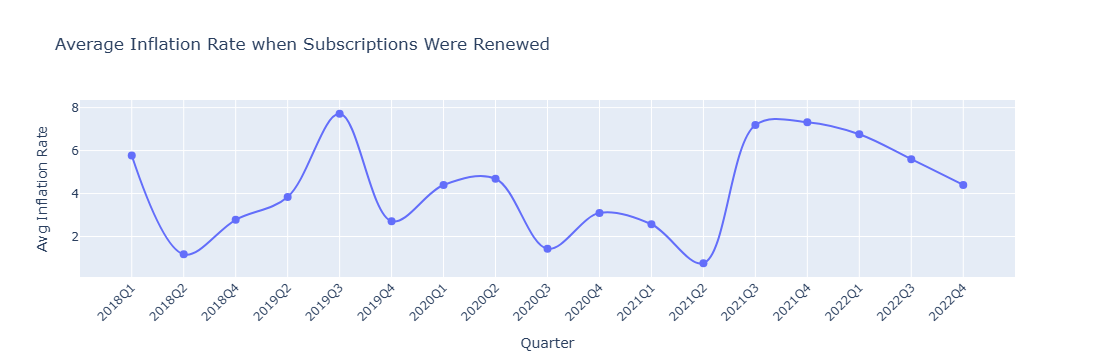

In [52]:
''' I also tried with associating the start and end dates with each subscription of client with the 
financial data inflation rates and start and end date.
but almost every industry clients susbscription were recorded on every other quarter so the chart was very similar. 
Maybe if we have huge amount of data, we can proceed with that'''

# I tried to project it with the help of quarters - 3 month time for each quarter - q1,q2,q3,q4

# Ensure financial data dates are correctly formatted
financial_data_copy = financial_data.copy()
financial_data_copy["start_date"] = pd.to_datetime(financial_data_copy["start_date"], format="%d-%m-%Y", errors='coerce')

# Ensure subscription data dates are correctly formatted
subscription_data_copy = subscription_data.copy()
subscription_data_copy["start_date"] = pd.to_datetime(subscription_data_copy["start_date"], format="%m-%d-%Y", errors='coerce')
subscription_data_copy["end_date"] = pd.to_datetime(subscription_data_copy["end_date"], format="%m-%d-%Y", errors='coerce')

# Average Inflation Rate when Subscriptions Were Renewed
subscription_data_copy['quarter'] = subscription_data_copy['start_date'].dt.to_period('Q').astype(str)
financial_data_copy['quarter'] = financial_data_copy['start_date'].dt.to_period('Q').astype(str)

merged_data = subscription_data_copy.merge(financial_data_copy[['quarter', 'inflation_rate']], on='quarter', how='left')
avg_inflation_when_renewed = merged_data[merged_data['renewed']].groupby('quarter')['inflation_rate'].mean().reset_index()

fig_inflation = px.line(
    avg_inflation_when_renewed, x='quarter', y='inflation_rate', 
    markers=True, title='Average Inflation Rate when Subscriptions Were Renewed',
    labels={'quarter': 'Quarter', 'inflation_rate': 'Avg Inflation Rate'},
    line_shape='spline'
)
fig_inflation.update_traces(marker=dict(size=8))
fig_inflation.update_layout(xaxis=dict(tickangle=-45))
fig_inflation.show()
pio.write_html(fig, "Average Inflation Rate when Subscriptions Were Renewed.html")


In [17]:
# Ensure datetime conversion
financial_data['start_date'] = pd.to_datetime(financial_data['start_date'], errors='coerce')
financial_data['end_date'] = pd.to_datetime(financial_data['end_date'], errors='coerce')
payment_data['payment_date'] = pd.to_datetime(payment_data['payment_date'], errors='coerce')
subscription_data['start_date'] = pd.to_datetime(subscription_data['start_date'], errors='coerce')
subscription_data['end_date'] = pd.to_datetime(subscription_data['end_date'], errors='coerce')


C:\Users\Kakashi\AppData\Local\Temp\ipykernel_14080\2478097334.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\Kakashi\AppData\Local\Temp\ipykernel_14080\2478097334.py:3: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



Average Inflation Rate at Subscription Renewal: 4.43%


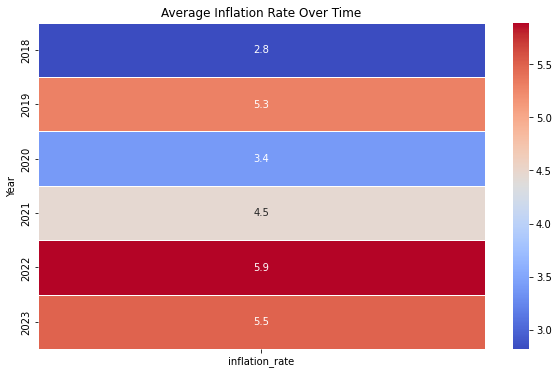

In [28]:
#this is to show which year had the most inflation and what was the inflation rate

avg_inflation_rate = financial_data['inflation_rate'].mean()
print(f'Average Inflation Rate at Subscription Renewal: {avg_inflation_rate:.2f}%')

# Inflation rate visualization using a heatmap
financial_data['Year'] = financial_data['start_date'].dt.year
df_inflation = financial_data.groupby('Year')['inflation_rate'].mean().reset_index()
df_inflation_pivot = df_inflation.pivot_table(values='inflation_rate', index='Year')
plt.figure(figsize=(10,6))
sns.heatmap(df_inflation_pivot, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Average Inflation Rate Over Time')
plt.ylabel('Year')
plt.show()

4.	What is the median amount paid each year for all payment methods? 

In [41]:
#this table is just to show the median amount paid by clients every year

payment_data['payment_year'] = payment_data['payment_date'].dt.year
median_payments = payment_data.groupby('payment_year')['amount_paid'].median().reset_index()


print(median_payments)

   payment_year  amount_paid
0          2018        235.7
1          2019        360.9
2          2020        284.5
3          2021        306.8
4          2022        288.0


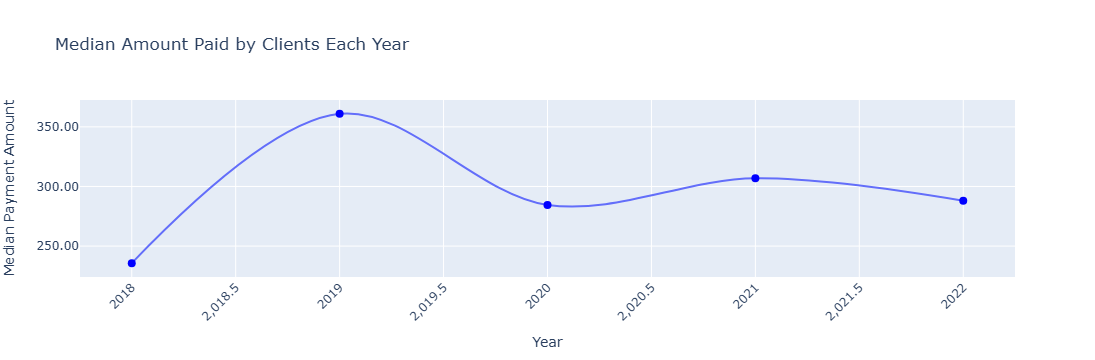

In [53]:
import plotly.express as px

# Create an interactive line chart
fig_median_payment = px.line(
    median_payments, x='payment_year', y='amount_paid', 
    markers=True, title='Median Amount Paid by Clients Each Year',
    labels={'payment_year': 'Year', 'amount_paid': 'Median Amount Paid'},
    line_shape='spline'
)

# Customize marker size and layout
fig_median_payment.update_traces(marker=dict(size=8, color='blue'))
fig_median_payment.update_layout(
    xaxis=dict(tickangle=-45),
    yaxis=dict(title='Median Payment Amount', tickformat='.2f')
)

fig_median_payment.show()
pio.write_html(fig, "Median Payment Amount.html")


C:\Users\Kakashi\anaconda3\lib\site-packages\plotly\express\_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



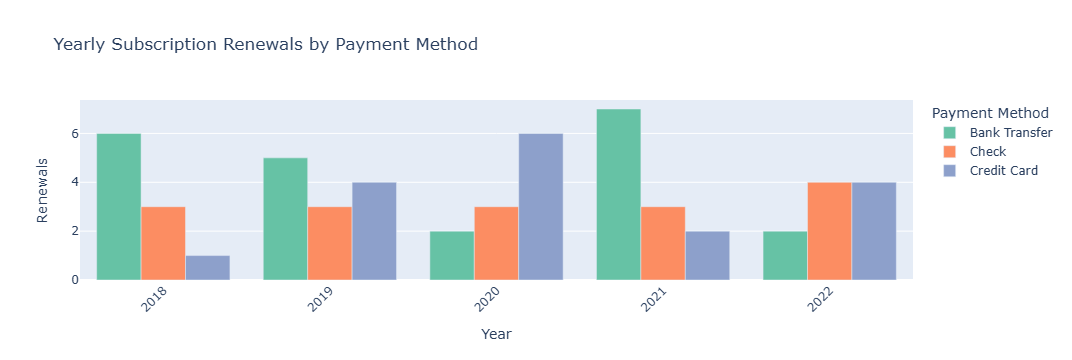

NameError: name 'fig_monthly' is not defined

In [54]:
''' I kept converting to datetime because for every code snippet, 
I kept getting errors on this space. I know this is not effective, but more time giving  I can find a more time and space complex code.'''

# this code is to find which subscription payment method had most renewals - by year and by month
# Convert start_date to datetime
subscription_data["start_date"] = pd.to_datetime(subscription_data["start_date"])

# Yearly Renewals by Payment Method
yearly_renewals = subscription_data.groupby([subscription_data['start_date'].dt.year, 'payment_method'])['renewed'].sum().reset_index()
yearly_renewals.columns = ['Year', 'Payment Method', 'Yearly Renewals']

fig_yearly = px.bar(
    yearly_renewals, x='Year', y='Yearly Renewals', color='Payment Method',
    barmode='group', title='Yearly Subscription Renewals by Payment Method',
    labels={'Year': 'Year', 'Yearly Renewals': 'Renewals'},
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig_yearly.update_layout(xaxis=dict(tickangle=-45), bargap=0.2)
fig_yearly.show()

# Monthly Renewals by Payment Method
subscription_data['Month'] = subscription_data['start_date'].dt.to_period('M').astype(str)
monthly_renewals = subscription_data.groupby(['Month', 'payment_method'])['renewed'].sum().reset_index()
monthly_renewals.columns = ['Month', 'Payment Method', 'Monthly Renewals']

# Determine the exact range to zoom in properly
y_min = max(0, monthly_renewals['Monthly Renewals'].min() - 1)  # Ensure not negative
y_max = monthly_renewals['Monthly Renewals'].max() + 1  # Slightly above max

fig_monthly.update_layout(
    xaxis=dict(tickangle=-45),
    yaxis=dict(title="Monthly Renewals", range=[y_min, y_max]),  # Set precise range
    height=500  # Adjust height for better visibility
)


fig_monthly.update_layout(xaxis=dict(tickangle=-45), bargap=0.2)
fig_monthly.show()
pio.write_html(fig, "Monthly Renewals.html")

In [ ]:
These are extra insights that I could give from the data you provided

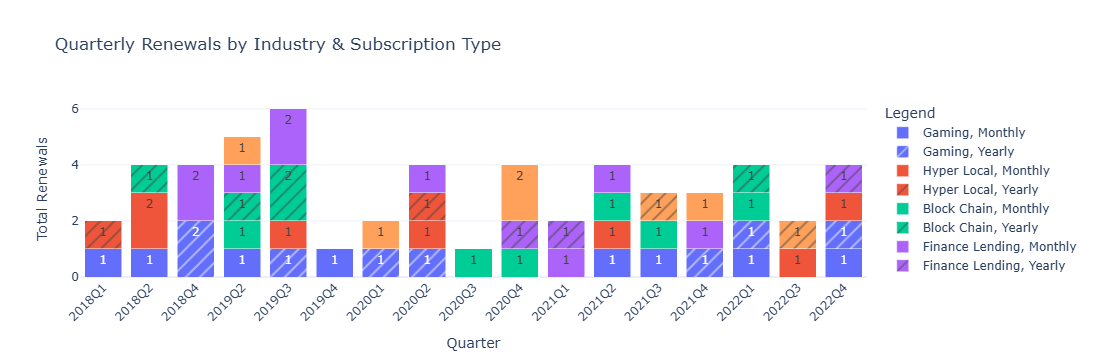

In [44]:
''' Again divided the years by 4 quarters associated industry, 
subscription type with the help of colors and shapes to show you a better understanding of which industry has which kinda subscriptions'''

# Convert start_date to datetime
subscription_data["start_date"] = pd.to_datetime(subscription_data["start_date"])

# Extract year and quarter, and convert to proper sorting format
subscription_data["quarter"] = subscription_data["start_date"].dt.to_period("Q")

# Merge subscription_data with industry_data
subscription_industry = subscription_data.merge(industry_data, on="client_id", how="left")

# Ensure 'renewed' is boolean
subscription_industry["renewed"] = subscription_industry["renewed"].astype(bool)

# Count renewals per quarter, industry, and subscription type
renewal_counts = subscription_industry[subscription_industry["renewed"]].groupby(
    ["quarter", "industry", "subscription_type"]
).size().reset_index(name="renewal_count")

# Sort by quarter (ensuring it's ordered chronologically)
renewal_counts = renewal_counts.sort_values(by="quarter")
renewal_counts["quarter"] = renewal_counts["quarter"].astype(str)  # Convert back for Plotly

# Stacked bar chart
fig = px.bar(
    renewal_counts,
    x="quarter",
    y="renewal_count",
    color="industry",
    barmode="stack",
    text_auto=True,
    pattern_shape="subscription_type",
    title="Quarterly Renewals by Industry & Subscription Type",
    labels={"renewal_count": "Number of Renewals", "quarter": "Quarter"},
)

# Improve layout
fig.update_layout(
    xaxis_tickangle=-45, 
    template="plotly_white",
    legend_title="Legend",
    yaxis=dict(title="Total Renewals"),
    xaxis=dict(categoryorder="array", categoryarray=sorted(renewal_counts["quarter"].unique()))
)

fig.show()
pio.write_html(fig, "Quarterly Renewals by Industry & Subscription Type.html")


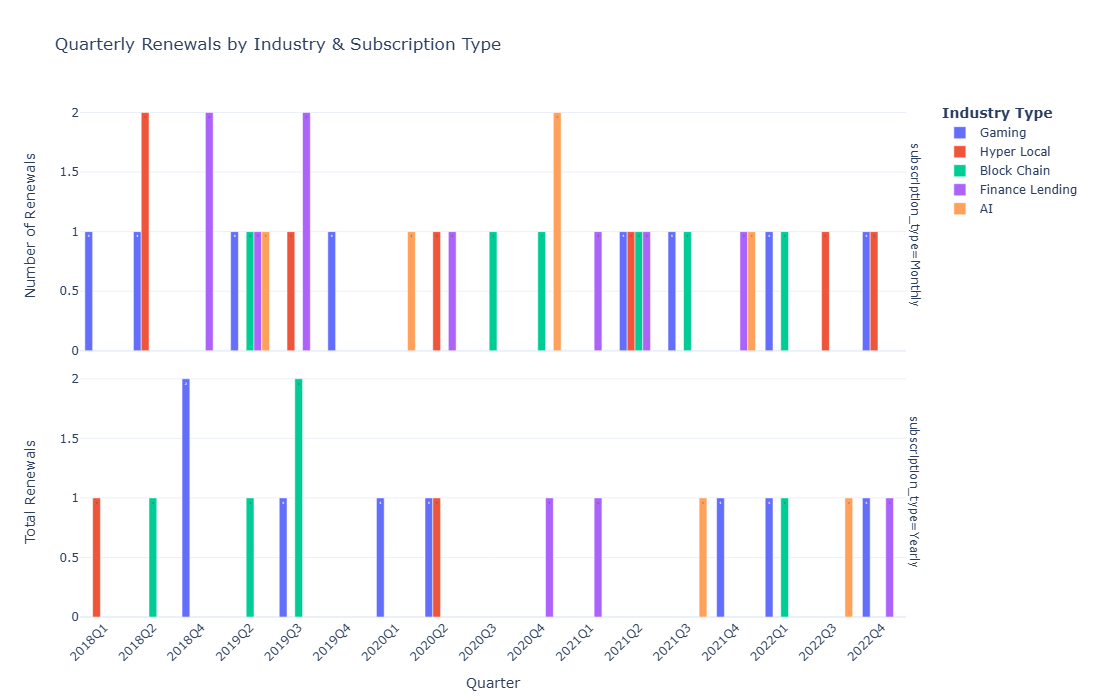

In [45]:
# This was the same idea but different chart I have tried

# Convert start_date to datetime
subscription_data["start_date"] = pd.to_datetime(subscription_data["start_date"])

# Extract year and quarter
subscription_data["quarter"] = subscription_data["start_date"].dt.to_period("Q")

# Merge with industry data
subscription_industry = subscription_data.merge(industry_data, on="client_id", how="left")

# Count renewals per quarter, industry, and subscription type
renewal_counts = (
    subscription_industry[subscription_industry["renewed"]]
    .groupby(["quarter", "industry", "subscription_type"])["client_id"]
    .count()
    .reset_index()
)

# Rename columns
renewal_counts.columns = ["quarter", "industry", "subscription_type", "renewal_count"]

# Sort quarters chronologically
renewal_counts = renewal_counts.sort_values(by="quarter")
renewal_counts["quarter"] = renewal_counts["quarter"].astype(str)  # Convert back for Plotly

# Stacked bar chart (Grouped by subscription type)
fig = px.bar(
    renewal_counts,
    x="quarter",
    y="renewal_count",
    color="industry",
    barmode="group",
    text_auto=True,
    facet_row="subscription_type",  # Separate subscription types
    title="Quarterly Renewals by Industry & Subscription Type",
    labels={"renewal_count": "Number of Renewals", "quarter": "Quarter"},
)

# Ensure quarters are sorted properly
fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_white",
    yaxis=dict(title="Total Renewals"),
    legend_title_text="<b>Industry Type</b>",
    height=700,
    xaxis=dict(categoryorder="array", categoryarray=sorted(renewal_counts["quarter"].unique()))
)

fig.show()


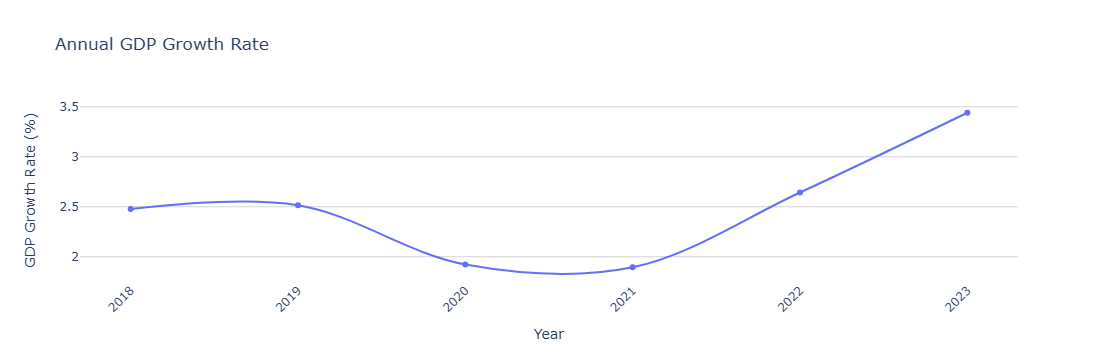

In [36]:
# Another important insight that would be helpful with huge amount of data

# Check if 'gdp_growth_rate' exists
if 'gdp_growth_rate' in financial_data.columns:
    gdp_growth_by_year = financial_data.groupby('year')['gdp_growth_rate'].mean().reset_index()

    # Create an interactive line plot with markers
    fig = px.line(
        gdp_growth_by_year, 
        x='year', 
        y='gdp_growth_rate', 
        markers=True,  # Adds markers for each data point
        title="Annual GDP Growth Rate",
        labels={"year": "Year", "gdp_growth_rate": "GDP Growth Rate (%)"},
        line_shape="spline",  # Makes the line smooth
    )

    # Improve layout
    fig.update_layout(
        xaxis=dict(tickangle=-45),  # Rotate x-axis labels
        yaxis=dict(gridcolor="lightgray"),
        plot_bgcolor="white",
    )

    # Show plot
    fig.show()

else:
    print("No GDP growth rate data available.")


In [48]:
# This is an interesting one where you can hover over cities, states and countries to find the number of client in the hovered area
# also shows by color concentration - the more, the more number of clients in the particular area

# Load India shapefile
india_map_url = "https://github.com/geohacker/india/raw/master/state/india_telengana.geojson"
india_map = gpd.read_file(india_map_url)

# Group industry data by city and count clients
city_client_counts = industry_data.groupby("location")["client_id"].count().reset_index()
city_client_counts.columns = ["city", "client_count"]

# Get latitude & longitude for each city (automatically)
geolocator = Nominatim(user_agent="geoapi")
city_client_counts["latitude"] = None
city_client_counts["longitude"] = None

for i, city in enumerate(city_client_counts["city"]):
    try:
        location = geolocator.geocode(city + ", India")
        if location:
            city_client_counts.at[i, "latitude"] = location.latitude
            city_client_counts.at[i, "longitude"] = location.longitude
    except:
        pass
    time.sleep(1)  # To avoid request limit errors

# Drop cities where coordinates were not found
city_client_counts = city_client_counts.dropna()

# Create an interactive map
fig = px.scatter_mapbox(
    city_client_counts, 
    lat="latitude", 
    lon="longitude", 
    size="client_count",  # Adjust size dynamically
    color="client_count", 
    hover_name="city", 
    hover_data={"client_count": True},
    color_continuous_scale="Viridis",
    zoom=4,
    title="Client Distribution by City in India"
)

fig.update_layout(
    mapbox_style="open-street-map", 
    margin={"r":0,"t":50,"l":0,"b":0},
)

# Display table of client counts per city
print(city_client_counts.sort_values(by='client_count', ascending=False))

fig.show()
pio.write_html(fig, "interactive_chart.html")


        city  client_count   latitude  longitude
2  Hyderabad            23  17.360589  78.474061
0   Banglore            20  13.024056  77.624052
1    Chennai            20  13.083694  80.270186
4  New Delhi            20  28.643086  77.219267
3     Mumbai            17  19.054999  72.869203


C:\Users\Kakashi\AppData\Local\Temp\ipykernel_25872\3222742654.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




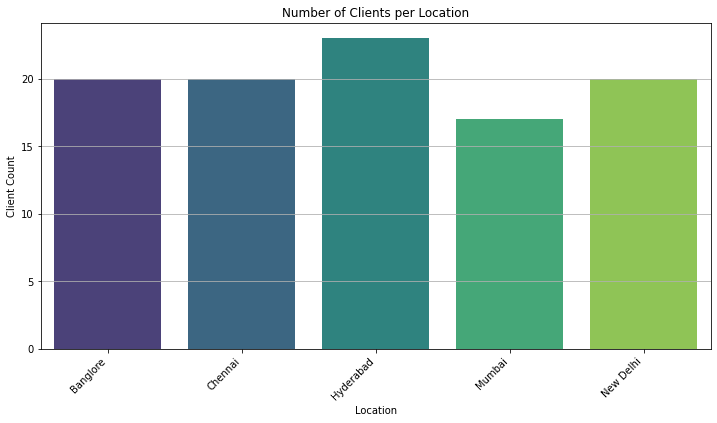

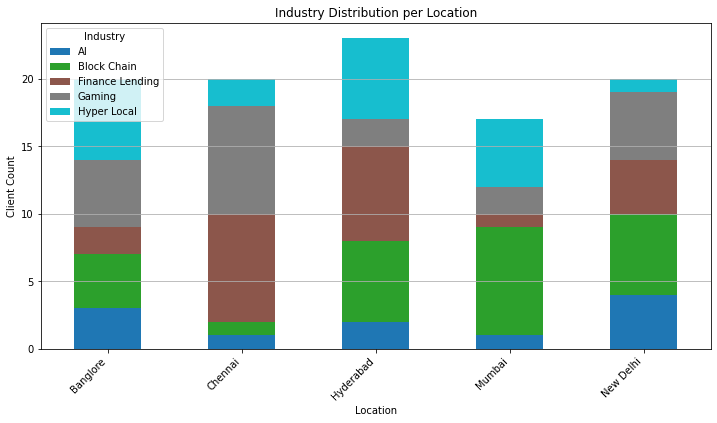

In [56]:
# A chart to visualise the same above with the help of bar charts. and the type of industry also 

# Group by location and count the number of clients per location
location_counts = industry_data.groupby('location')['client_id'].count().reset_index()
location_counts.columns = ['Location', 'Client Count']

# Group by location and industry type
industry_counts = industry_data.groupby(['location', 'industry']).size().unstack(fill_value=0)

# Plot bar chart for client count by location
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Client Count', data=location_counts, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Clients per Location')
plt.xlabel('Location')
plt.ylabel('Client Count')
plt.grid(axis='y')
plt.show()

# Plot stacked bar chart for industry distribution per location
industry_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.xticks(rotation=45, ha='right')
plt.title('Industry Distribution per Location')
plt.xlabel('Location')
plt.ylabel('Client Count')
plt.legend(title='Industry')
plt.grid(axis='y')
plt.show()
